In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import cartopy
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature

#from nansat import Nansat, Domain, NSR

#from sea_ice_drift import get_n
#from sea_ice_drift.ftlib import feature_tracking
#from sea_ice_drift.pmlib import pattern_matching
from sea_ice_drift.libdefor import get_deformation_nodes

#import csv

%matplotlib inline

In [106]:
gpi2_combined_path = "/home/jovyan/experiment_data/2022-2023_48h_experiment/drift_output/12_14_feb/gpi_1214fab_hh_hv.npy"
gpi2_combined = np.load(gpi2_combined_path)

In [347]:
%store -r n1b1
%store -r n2b1

In [4]:
# Exporting u and v combibed 

upm_combined_path = "/home/jovyan/experiment_data/2022-2023_48h_experiment/drift_output/12_14_feb/upm_combined.npy"
upm_combined = np.load(upm_combined_path)
vpm_combined_path = "/home/jovyan/experiment_data/2022-2023_48h_experiment/drift_output/12_14_feb/vpm_combined.npy"
vpm_combined = np.load(vpm_combined_path)

x1pm_path = "/home/jovyan/experiment_data/2022-2023_48h_experiment/grid_general_data/x1pm.npy"
x1pm = np.load(x1pm_path)
y1pm_path = "/home/jovyan/experiment_data/2022-2023_48h_experiment/grid_general_data/y1pm.npy"
y1pm = np.load(y1pm_path)

In [14]:
%store -r total_time_diff
total_time_diff

171820

In [317]:
u = upm_combined /total_time_diff
v = vpm_combined /total_time_diff

# compute deformation components [1/s], area [m2], perimeter [m], triangulation
e1_alg, e2_alg, e3_alg, a_alg, p_alg, t_alg = get_deformation_nodes(x1pm[gpi2_combined], y1pm[gpi2_combined], u[gpi2_combined], v[gpi2_combined])
# create mask for invalid elements (too squeezed or too large)
mask_alg = (np.sqrt(a_alg)/p_alg < 0.15) + (a_alg > 0.2e8)

In [228]:
%store -r crs

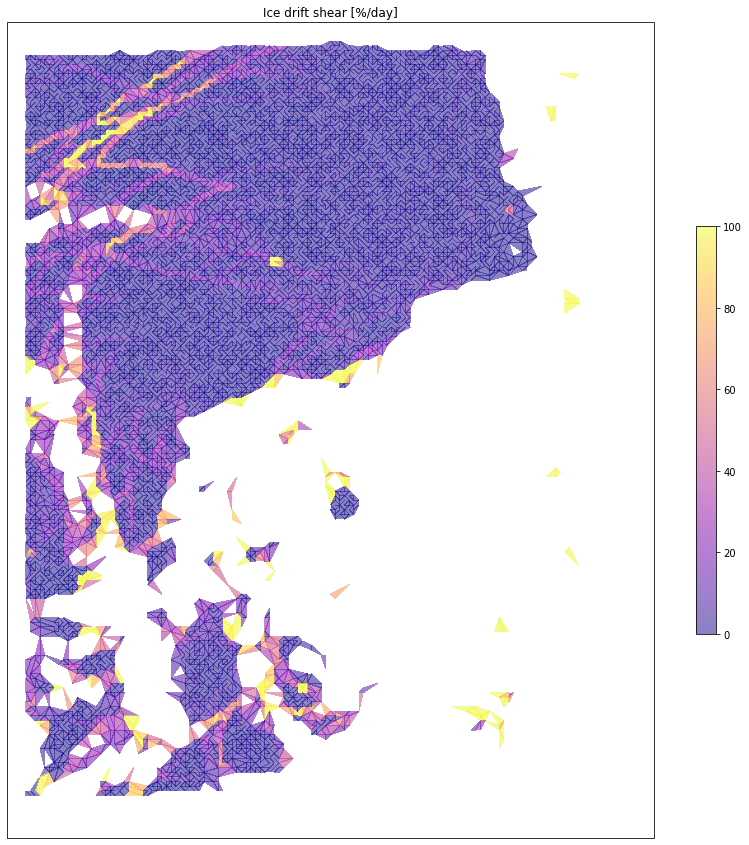

In [229]:
# plot deformation on top of the SAR image

plt.figure(figsize=(15,15))
ax = plt.axes(projection=crs)

# Compute the transformed values
shear_values = e2_alg * 24 * 60 * 60 * 100

# Create a mask for values less than or equal to 40
masked_values = np.where(shear_values > 0, shear_values, np.nan)

#ax.imshow(n1b1, cmap='gray', extent=[x1pm.min(), x1pm.max(), y1pm.min(), y1pm.max()], origin='upper')
trp = plt.tripcolor(x1pm[gpi2_combined], y1pm[gpi2_combined], masked_values, triangles=t_alg, vmin=0, vmax=100, cmap='plasma',  mask = mask_alg, alpha=0.5)


plt.colorbar(trp, shrink=0.5)
plt.title('Ice drift shear [%/day]')
#ax.add_feature(land_50m, edgecolor='black')
ax.set_xlim([0.28e6, 0.65e6]) 
ax.set_ylim([0.17e6, 0.59e6])


plt.show()

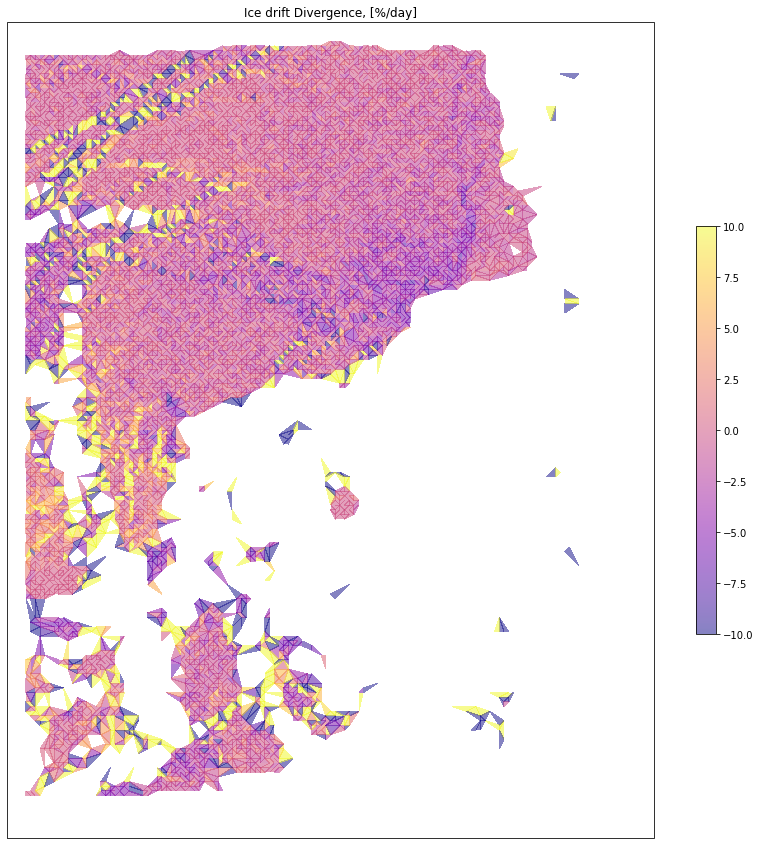

In [230]:
# plot deformation on top of the SAR image

plt.figure(figsize=(15,15))
ax = plt.axes(projection=crs)

#ax.imshow(n1b1, cmap='gray', extent=[x1pm.min(), x1pm.max(), y1pm.min(), y1pm.max()], origin='upper')
trp = plt.tripcolor(x1pm[gpi2_combined], y1pm[gpi2_combined], e1_alg*24*60*60*100, triangles=t_alg, vmin=-10, vmax=10, cmap='plasma',mask=mask_alg,  alpha=0.5)

plt.colorbar(trp, shrink=0.5)
plt.title('Ice drift Divergence, [%/day]')
#ax.add_feature(land_50m, edgecolor='black')
ax.set_xlim([0.28e6, 0.65e6]) 
ax.set_ylim([0.17e6, 0.59e6])
plt.show()

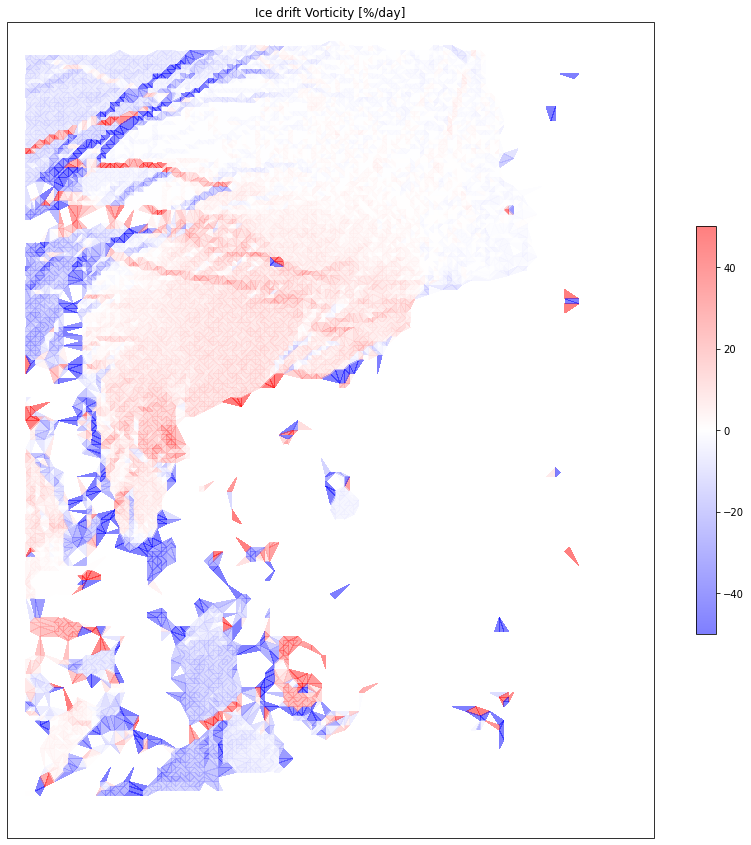

In [237]:
# plot deformation on top of the SAR image

plt.figure(figsize=(15,15))
ax = plt.axes(projection=crs)

trp = plt.tripcolor(x1pm[gpi2_combined], y1pm[gpi2_combined], e3_alg*24*60*60*100, triangles=t_alg, vmin=-50, vmax=50, cmap='bwr', mask=mask_alg, alpha=0.5)

plt.colorbar(trp, shrink=0.5)
plt.title('Ice drift Vorticity [%/day]')
ax.set_xlim([0.28e6, 0.65e6]) 
ax.set_ylim([0.17e6, 0.59e6])

plt.show()

#### Model data

In [219]:
cum_dx_b_subset_path = "/home/jovyan/experiment_data/2022-2023_48h_experiment/drift_output/12_14_feb/cum_dx_b_subset.npy"
cum_dy_b_subset_path = "/home/jovyan/experiment_data/2022-2023_48h_experiment/drift_output/12_14_feb/cum_dy_b_subset.npy"
cum_dx_b_subset = np.load(cum_dx_b_subset_path)
cum_dy_b_subset = np.load(cum_dy_b_subset_path)

In [245]:
gpi = np.full(gpi2_combined.shape, True)


In [258]:
#gpi = gpi.fill(True)

u = cum_dx_b_subset /total_time_diff
v = cum_dy_b_subset /total_time_diff

# compute deformation components [1/s], area [m2], perimeter [m], triangulation
e1, e2, e3, a, p, t = get_deformation_nodes(x1pm[gpi], y1pm[gpi], u[gpi], v[gpi])
# create mask for invalid elements (too squeezed or too large)
mask = (np.sqrt(a)/p < 0.15) + (a > 0.1e8)

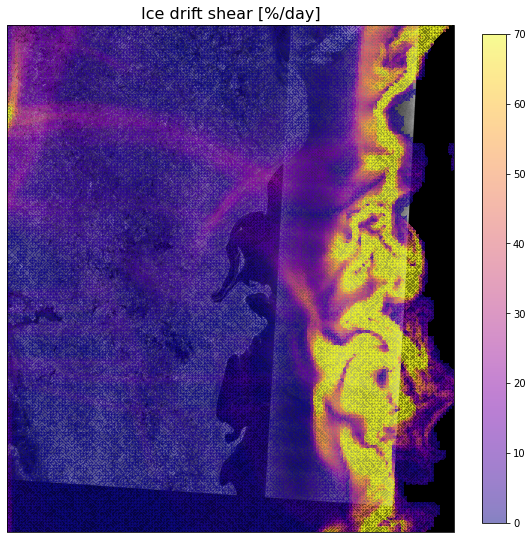

In [349]:
# plot deformation on top of the SAR image

plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)

# Compute the transformed values
shear_values = e2 * 24 * 60 * 60 * 100

# Create a mask for values less than or equal to 40
masked_values = np.where(shear_values > 0, shear_values, np.nan)

ax.imshow(n1b1, cmap='gray', extent=[x1pm.min(), x1pm.max(), y1pm.min(), y1pm.max()], origin='upper')
trp = plt.tripcolor(x1pm[gpi], y1pm[gpi], masked_values, triangles=t, vmin=0, vmax=70, cmap='plasma',  alpha=0.5)


plt.colorbar(trp, shrink=0.9)
plt.title('Ice drift shear [%/day]', fontsize=16)
#ax.add_feature(land_50m, edgecolor='black')
ax.set_xlim([0.28e6, 0.65e6]) 
ax.set_ylim([0.17e6, 0.59e6])

# Save plot
#plt.savefig("/home/jovyan/experiment_data/2022-2023_48h_experiment/figures/deform_model_shear.png", dpi=300, bbox_inches='tight')


plt.show()

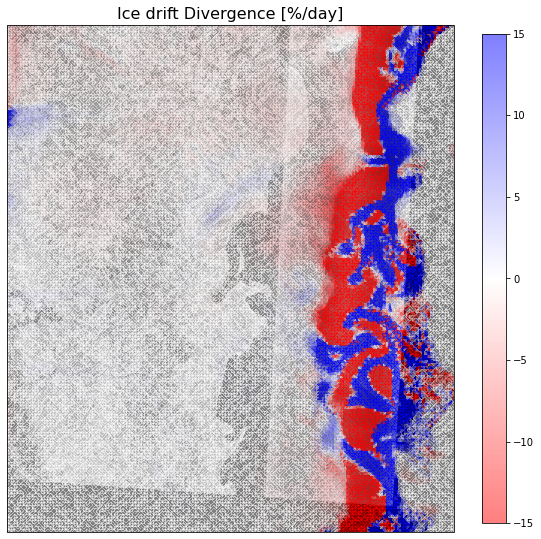

In [360]:
# plot deformation on top of the SAR image

plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)

ax.imshow(n1b1, cmap='gray', extent=[x1pm.min(), x1pm.max(), y1pm.min(), y1pm.max()], origin='upper')
trp = plt.tripcolor(x1pm[gpi], y1pm[gpi], e1*24*60*60*100, triangles=t, vmin=-15, vmax=15, cmap='bwr_r',mask=mask,  alpha=0.5)

plt.colorbar(trp, shrink=0.9)
plt.title('Ice drift Divergence [%/day]', fontsize=16)
#ax.add_feature(land_50m, edgecolor='black')
ax.set_xlim([0.28e6, 0.65e6]) 
ax.set_ylim([0.17e6, 0.59e6])

# Save plot
plt.savefig("/home/jovyan/experiment_data/2022-2023_48h_experiment/figures/deform_model_diverg.png", dpi=300, bbox_inches='tight')


plt.show()

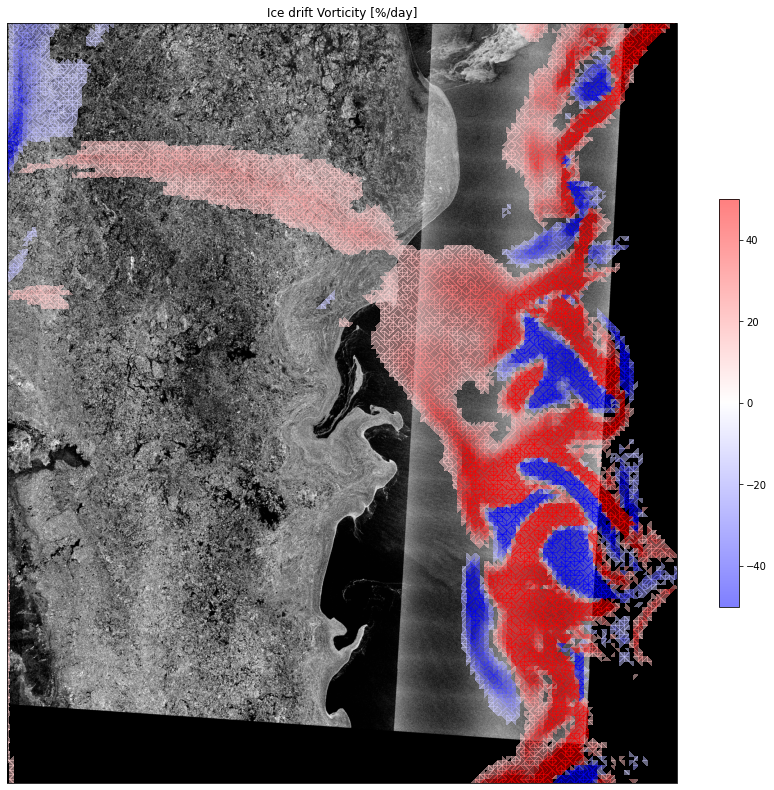

In [330]:
# plot deformation on top of the SAR image

plt.figure(figsize=(15,15))
ax = plt.axes(projection=crs)

vorticity_values = e3*24*60*60*100

# Create a mask for values less than -40 or greater than 40
masked_values = np.where((vorticity_values < -9) | (vorticity_values > 9), vorticity_values, np.nan)


ax.imshow(n1b1, cmap='gray', extent=[x1pm.min(), x1pm.max(), y1pm.min(), y1pm.max()], origin='upper')
trp = plt.tripcolor(x1pm[gpi], y1pm[gpi], masked_values, triangles=t, vmin=-50, vmax=50, cmap='bwr', mask=mask, alpha=0.5)

plt.colorbar(trp, shrink=0.5)
plt.title('Ice drift Vorticity [%/day]')
ax.set_xlim([0.28e6, 0.65e6]) 
ax.set_ylim([0.17e6, 0.59e6])

plt.show()

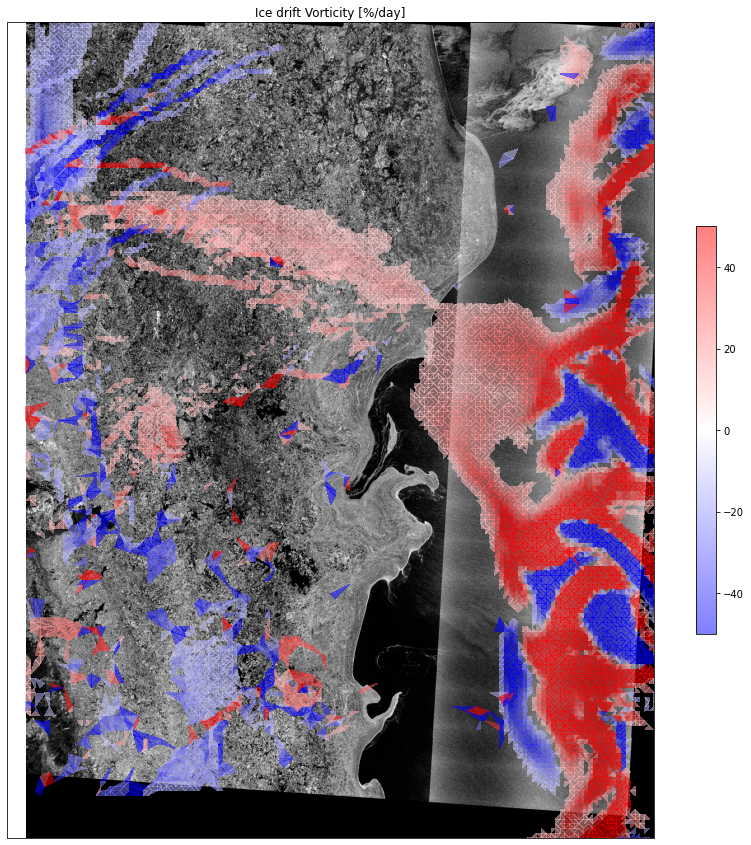

In [321]:
# plot deformation on top of the SAR image

plt.figure(figsize=(15,15))
ax = plt.axes(projection=crs)

vorticity_values = e3*24*60*60*100

# Create a mask for values less than -40 or greater than 40
masked_values = np.where((vorticity_values < -10) | (vorticity_values > 10), vorticity_values, np.nan)


ax.imshow(n1b1, cmap='gray', extent=[x1pm.min(), x1pm.max(), y1pm.min(), y1pm.max()], origin='upper')
trp = plt.tripcolor(x1pm[gpi], y1pm[gpi], masked_values, triangles=t, vmin=-50, vmax=50, cmap='bwr',mask=mask, alpha=0.5)

vorticity_values_alg = e3_alg*24*60*60*100

# Create a mask for values less than -40 or greater than 40
masked_values_alg = np.where((vorticity_values_alg < -10) | (vorticity_values_alg > 10), vorticity_values_alg, np.nan)

trp2 = plt.tripcolor(x1pm[gpi2_combined], y1pm[gpi2_combined], masked_values_alg, triangles=t_alg, vmin=-50, vmax=50, cmap='bwr', mask = mask_alg, alpha=0.5)

plt.colorbar(trp, shrink=0.5)
plt.title('Ice drift Vorticity [%/day]')
ax.set_xlim([x1pm.min()-10000, x1pm.max()-210000])
ax.set_ylim([y1pm.min()+110000, y1pm.max()-160000])

plt.show()